# Chapter 4: Discovering Interpretable Features

This Chapter introduces dimension reduction technique called "Non-negative matrix factorization" ("NMF") that expresses samples as combinations of interpretable parts. 

## Non-negative matrix factorization ("NMF")

- Dimension reduction technique
- NMF models are interpretable (unlike PCA)
- Easy to interpret means easy to explain!
- However, all sample features must be non-negative (>= 0)
- NMF expresses documents as combinations of topics (or "themes")
- NMF expresses images as combinations of patterns

Using scikit-learn NMF
- Follows `fit()` / `transform(`) pattern
- Must specify number of components e.g. NMF(`n_components=2`)
- Works with `NumPy` arrays and with `csr_matrix`

In [5]:
# starter code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('ggplot')

In [2]:
# Word-frequency array sample
documents =  ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
samples = tfidf.fit_transform(documents)

# Print result of toarray() method
print(samples.toarray())

# Get the words: words
words = tfidf.get_feature_names_out()
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


In [3]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=2)

# Fit the model to articles
model.fit(samples)

# Transform the articles: nmf_features
nmf_features = model.transform(samples)

# Print the NMF features
print(nmf_features.round(2))

[[0.51 0.  ]
 [0.   0.88]
 [0.51 0.  ]]


In [6]:
# Load Wikipedia articles

from scipy.sparse import csr_matrix
df = pd.read_csv('datasets/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [7]:
# NMF applied to Wikipedia articles

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
nmf_features = model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features[:10])

[[0.         0.         0.         0.         0.         0.43868418]
 [0.         0.         0.         0.         0.         0.56432181]
 [0.00377656 0.         0.         0.         0.         0.39703363]
 [0.         0.         0.         0.         0.         0.38019495]
 [0.         0.         0.         0.         0.         0.48356689]
 [0.01278286 0.01371551 0.00772633 0.03321641 0.         0.33317602]
 [0.         0.         0.02057253 0.         0.00601909 0.35760636]
 [0.         0.         0.         0.         0.         0.48900512]
 [0.0152499  0.01420262 0.00374828 0.02355176 0.0261477  0.47883081]
 [0.0110488  0.03119738 0.03079782 0.06525083 0.01958109 0.33692818]]


In [8]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features,index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003815
1    0.000000
2    0.000000
3    0.571854
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005575
2    0.000000
3    0.419555
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


In [9]:
# datasets required
# NMF model created above
f = open("datasets/wikipedia-vocabulary-utf8.txt",'r',encoding='utf-8')
words = f.read().split('\n')

In [10]:
model = NMF(n_components=6)

# Fit the model to articles
nmf_features = model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

In [11]:
# NMF learns topics of documents

# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film       0.632192
award      0.254869
starred    0.246970
role       0.212904
actress    0.187678
Name: 3, dtype: float64


### Image reconstruction using the Digits dataset

In [13]:
# Digits dataset
samples = pd.read_csv("datasets/lcd-digits.csv",header=None).values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


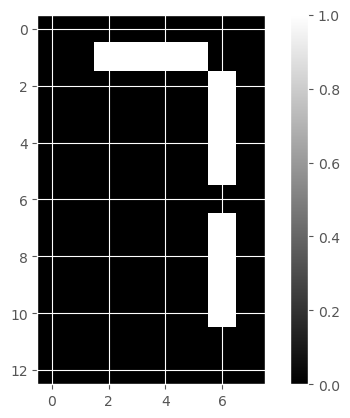

In [14]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [15]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

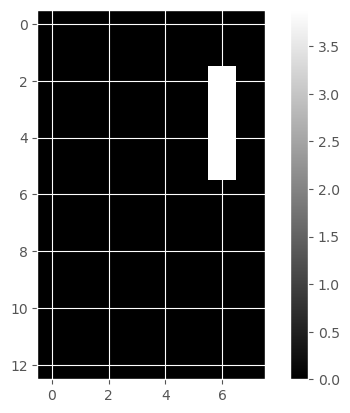

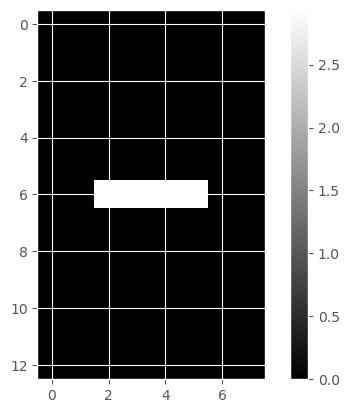

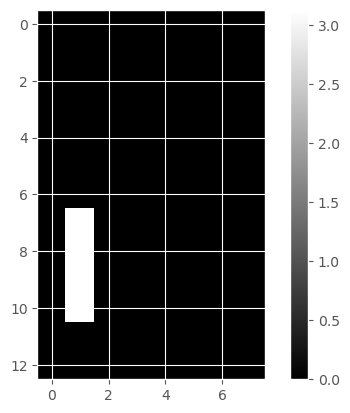

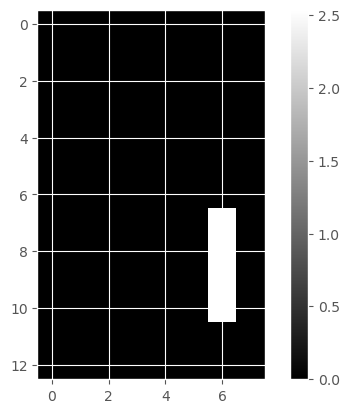

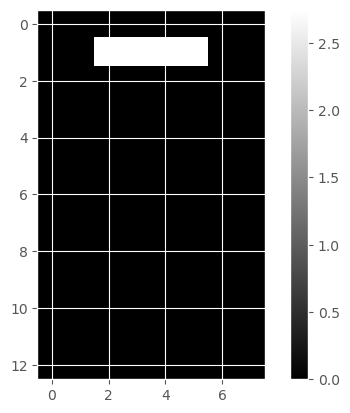

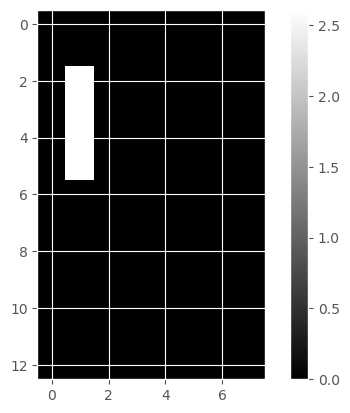

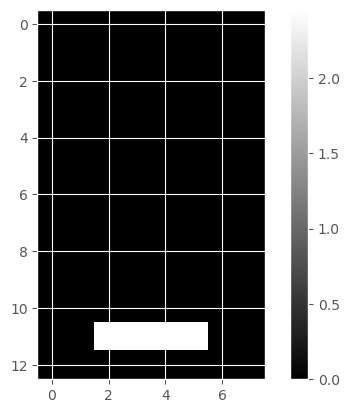

[2.57347960e-01 0.00000000e+00 0.00000000e+00 3.94333376e-01
 3.64045642e-01 0.00000000e+00 3.51282114e-14]


In [16]:
# NMF learns the parts of images

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

## Building recommender systems using NMF

In [17]:
# Finding similar articles

from sklearn.decomposition import NMF
nmf = NMF(n_components=6)
nmf_features = nmf.fit_transform(articles)

In [18]:
# Calculating the cosine similarities

from sklearn.preprocessing import normalize
norm_features = normalize(nmf_features)
current_article = norm_features[23,:] # if has index 23
similarities = norm_features.dot(current_article)
print(similarities)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.89786255e-02 0.00000000e+00 0.00000000e+00
 4.90119358e-02 1.88163795e-01 0.00000000e+00 0.00000000e+00
 1.90665141e-01 3.22594410e-02 0.00000000e+00 0.00000000e+00
 8.58010683e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.92339970e-01 1.00000000e+00 9.99911461e-01 1.00000000e+00
 1.00000000e+00 9.45698470e-01 9.99921428e-01 9.99047976e-01
 9.99977287e-01 9.99323397e-01 0.00000000e+00 1.02526510e-02
 7.01567164e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.07954245e-01 5.18946346e-02 3.64587088e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.03933263e-02
 1.08205472e-03 0.00000000e+00 0.00000000e+00 9.98981339e-04
 3.11383675e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.26527892e-02 9.89528541e-02 0.00000000e+00 0.00000000e+00
 1.89062651e-01 0.00000000e+00 3.02516315e-02 2.52771507e-01]


In [21]:
# DataFrames and labels

import pandas as pd
norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features, index=titles)
current_article = df.loc['Catherine Zeta-Jones']
similarities = df.dot(current_article)
print(similarities.nlargest())

Michael Fassbender      1.000000
Catherine Zeta-Jones    1.000000
Jessica Biel            1.000000
Anne Hathaway           0.999977
Mila Kunis              0.999921
dtype: float64


In [24]:
# Which articles are similar to 'Cristiano Ronaldo'?

# Perform the necessary imports
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999973
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


In [26]:
# Musical Artists Dataset

df = pd.read_csv("datasets/Musical artists/scrobbler-small-sample.csv")
df = df.pivot_table(values='playcount',index='artist_offset',columns='user_offset',aggfunc=sum,fill_value=0.)
df = df.astype(float)
artists = csr_matrix(df)
artist_names = list(pd.read_csv("datasets/Musical artists/artists.csv",header=None)[0])

In [27]:
# Recommend musical artists part I

# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

In [30]:
# Recommend musical artists part II

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=artist_names)

# Select row of 'Neil Young': artist
artist = df.loc['Neil Young']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Neil Young           1.000000
Bruce Springsteen    0.948527
Bob Dylan            0.939128
Leonard Cohen        0.920996
Ryan Adams           0.904788
dtype: float64
